# Prediction of car prices
Goal of the project is to create the best model to predict car prices.
Data is based on one of the Polish biggest automotive website, otomoto.pl

In [1]:
# bs4 webscraping, requests get source code, numpy/pandas data management, matplotlib charts
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Example car will be Hyundai i30
BASE_URL = r'https://www.otomoto.pl/osobowe/hyundai/i30/'

"""
Class of car offer with all parameters from the website
"""
class Offer:
    def __init__(self, year:int, mileage:int, fuel_type:str,price:int):
        self.year = year
        self.mileage = mileage
        self.fuel_type = fuel_type
        self.price = price

        
"""
Function checks maximum number of pages with offers
"""
def get_pages_number(url:str):
    html = requests.get(url).text
    main_page = BeautifulSoup(html, 'lxml')
    pages_number = main_page.select('.page')[-1].text
    return int(pages_number)

PAGES_TO_SCRAP = get_pages_number(BASE_URL)
    
"""
Returns list of all offers objects
"""
def get_offers_data(url:str, page_number:int):
    offers_list = []
    for page in range(1,PAGES_TO_SCRAP):
        print(f'Page {page}')
        page_url = url + f'?page={page}'
        print(page_url)
        html = requests.get(page_url).text
        main_page = BeautifulSoup(html, 'lxml')
        offers = main_page.select('.offer-item__content')
        for offer in offers:
            try:
                offer_url = offer.select('.offer-title__link')[0].attrs['href']
                year = int(offer.find('li', {'data-code':'year'}).text.strip())
                mileage = int(offer.find('li', {'data-code':'mileage'}).text.strip()[:-3].replace(" ",""))
                fuel_type = offer.find('li', {'data-code':'fuel_type'}).text.strip()
                price = int(offer.select('.offer-price__number')[0].span.text.strip().replace(" ",""))

                offer_object = Offer(year, mileage, fuel_type, price)
                #print(offer_object.__dict__)
                offers_list.append(offer_object.__dict__)
            except:
                print('collecting data error')
                
    return offers_list

In [3]:
all_offers_list = get_offers_data(BASE_URL, PAGES_TO_SCRAP)

Page 1
https://www.otomoto.pl/osobowe/hyundai/i30/?page=1
Page 2
https://www.otomoto.pl/osobowe/hyundai/i30/?page=2
Page 3
https://www.otomoto.pl/osobowe/hyundai/i30/?page=3
Page 4
https://www.otomoto.pl/osobowe/hyundai/i30/?page=4
Page 5
https://www.otomoto.pl/osobowe/hyundai/i30/?page=5
Page 6
https://www.otomoto.pl/osobowe/hyundai/i30/?page=6
Page 7
https://www.otomoto.pl/osobowe/hyundai/i30/?page=7
Page 8
https://www.otomoto.pl/osobowe/hyundai/i30/?page=8
Page 9
https://www.otomoto.pl/osobowe/hyundai/i30/?page=9
Page 10
https://www.otomoto.pl/osobowe/hyundai/i30/?page=10
Page 11
https://www.otomoto.pl/osobowe/hyundai/i30/?page=11
Page 12
https://www.otomoto.pl/osobowe/hyundai/i30/?page=12
Page 13
https://www.otomoto.pl/osobowe/hyundai/i30/?page=13
Page 14
https://www.otomoto.pl/osobowe/hyundai/i30/?page=14
Page 15
https://www.otomoto.pl/osobowe/hyundai/i30/?page=15
Page 16
https://www.otomoto.pl/osobowe/hyundai/i30/?page=16
Page 17
https://www.otomoto.pl/osobowe/hyundai/i30/?page=1

In [4]:
data = pd.DataFrame(all_offers_list)
data

,year,mileage,fuel_type,price
0,2018,31000,Benzyna,49400
1,2012,189046,Diesel,26500
2,2015,118334,Diesel,38500
3,2018,18000,Benzyna,59000
4,2012,97000,Benzyna,24900
...,...,...,...,...
1753,2008,88000,Benzyna,10000
1754,2008,197350,Benzyna,15000
1755,2008,307000,Diesel,12177
1756,2012,141665,Diesel,15900


In [5]:
#to avoid text variables
data = pd.get_dummies(data, columns=['fuel_type'])
data

,year,mileage,price,fuel_type_Benzyna,fuel_type_Benzyna+LPG,fuel_type_Diesel
0,2018,31000,49400,1,0,0
1,2012,189046,26500,0,0,1
2,2015,118334,38500,0,0,1
3,2018,18000,59000,1,0,0
4,2012,97000,24900,1,0,0
...,...,...,...,...,...,...
1753,2008,88000,10000,1,0,0
1754,2008,197350,15000,1,0,0
1755,2008,307000,12177,0,0,1
1756,2012,141665,15900,0,0,1


In [6]:
data.shape

(1758, 6)

In [7]:
data.describe()

,year,mileage,price,fuel_type_Benzyna,fuel_type_Benzyna+LPG,fuel_type_Diesel
count,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000
mean,2013.888510,108334.389647,34714.445392,0.613197,0.035267,0.351536
std,3.995597,75285.524608,19374.836773,0.487157,0.184507,0.477586
min,2007.000000,1.000000,4150.000000,0.000000,0.000000,0.000000
25%,2010.000000,33569.000000,18325.000000,0.000000,0.000000,0.000000
50%,2013.000000,114950.000000,29900.000000,1.000000,0.000000,0.000000
75%,2018.000000,167714.500000,49350.000000,1.000000,0.000000,1.000000
max,2020.000000,425000.000000,144800.000000,1.000000,1.000000,1.000000


In [8]:
X = data.drop(columns='price', axis=1)
y = data.price

# Modelling

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

In [10]:
from warnings import filterwarnings
filterwarnings("ignore")

In [11]:
# split to train and test data
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.33)

(<AxesSubplot:>, <AxesSubplot:>)

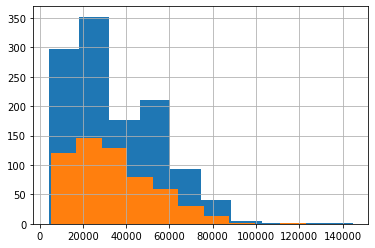

In [12]:
y_train.hist(), y_test.hist()

In [13]:
r2_list = []
rmse_list = []
y_pred_list = []

## LinearRegression

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_list.append(y_pred)

In [15]:
print(model.intercept_)
print(model.coef_)

-6942182.320639992
[ 3.46746783e+03 -5.47164223e-02  7.66605508e+02  1.51727163e+03
 -2.28387714e+03]


In [16]:
print('Linear Regression R squared: %.4f' % model.score(X_test, y_test))
r2 = r2_score(y_test, y_pred)
r2_list.append(r2)

Linear Regression R squared: 0.8408


In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_lr = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: %.2f'%rmse_lr)
rmse_list.append(rmse_lr)

RMSE: 7427.59


## Other models automatized

In [18]:

pipelines = ([Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ('poly', PolynomialFeatures()),
    ("model", Ridge())]),
             Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ('poly', PolynomialFeatures()),
    ("model", Lasso())]),
              Pipeline([
    ('scaler', StandardScaler()),
    ('reduce_dim', PCA()),
    ('model', RandomForestRegressor())
        ])
])


param_grids = [{"model__alpha":[300,400,500,600],
               "poly__degree":[1,2,3],
               "scaler__with_std": [True, False]},
               {"model__alpha":[0.01,0.1,1,10,100],
               "poly__degree":[1,2,3],
               "scaler__with_std": [True, False]},
               {"model__min_samples_leaf": [10,25,50,100],
                "model__max_depth": [None, 10],
                "scaler__with_std": [True, False]
               }
              ]

for model, grid in zip(pipelines, param_grids):
    gs = GridSearchCV(model, grid, cv=10)
    gs.fit(X_train, y_train)
    y_pred = gs.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f'{model}')
    print(f'rmse - {rmse}')
    print(f'r2 - {r2}')
    print(f'best params - {gs.best_params_}')
    rmse_list.append(rmse)
    r2_list.append(r2)
    y_pred_list.append(y_pred)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)
rmse - 6767.559707191969
r2 - 0.8678775400130745
best params - {'model__alpha': 500, 'poly__degree': 3, 'scaler__with_std': False}
Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Lasso

In [19]:
d = {'r2_score': r2_list, 
     'rmse': rmse_list
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['LinearRegression', 'Ridge', 'Lasso', 'RandomForestRegressor'])
df.sort_values(by=['r2_score'] ,ascending=False)

,Method,r2_score,rmse
1,Ridge,0.867878,6767.559707
3,RandomForestRegressor,0.866750,6796.382848
2,Lasso,0.864176,6861.712634
0,LinearRegression,0.840849,7427.593525


<AxesSubplot:xlabel='Method', ylabel='rmse'>

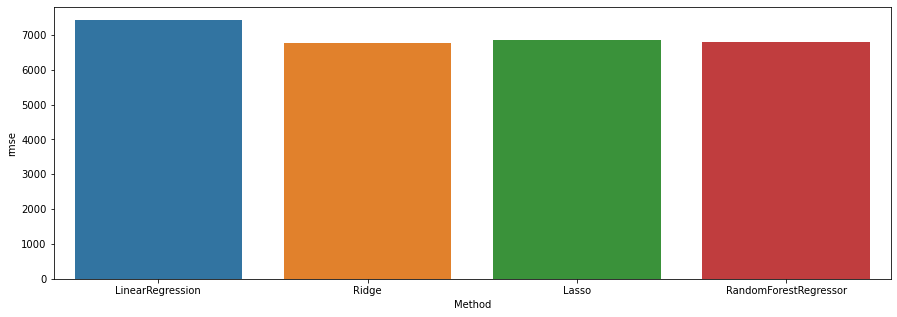

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x='Method', y='rmse', data=df.drop(columns='r2_score'), label='RMSE')

<AxesSubplot:xlabel='Method', ylabel='r2_score'>

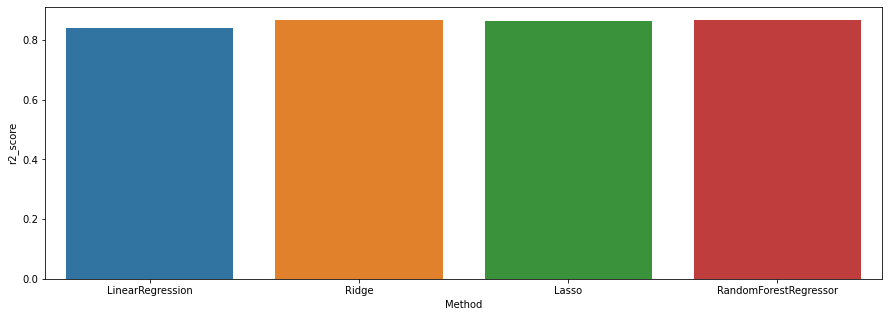

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(x='Method', y='r2_score', data=df.drop(columns='rmse'), label='R2')

# Final results
Ridge regression seems to be the most accurate but the differences are not that visible. The worst model was linear regression with r2 score 0,84 and RMSE 7427.59

In [33]:
from statsmodels.graphics.api import abline_plot

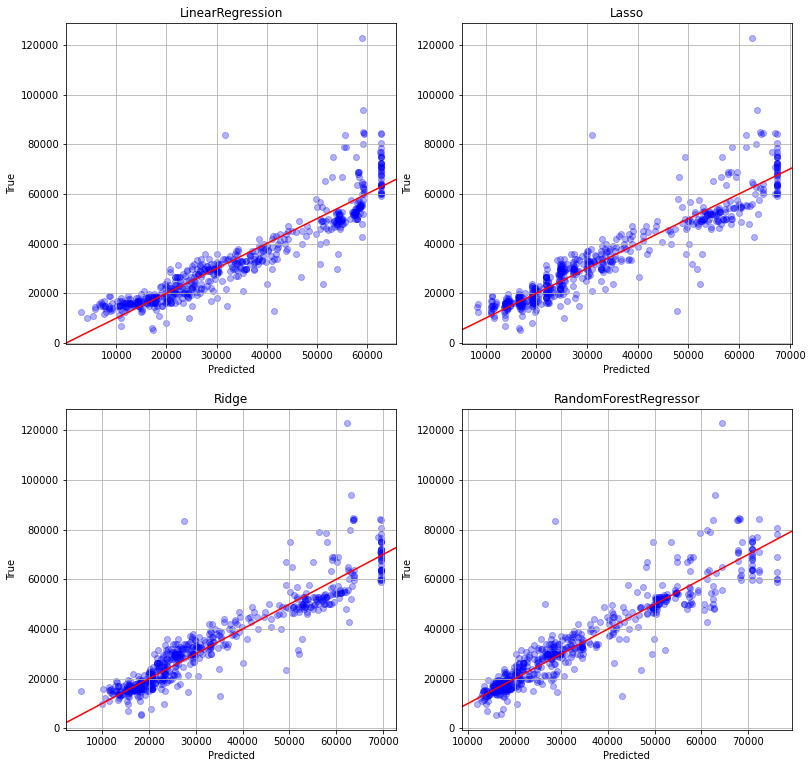

In [34]:
models = ['LinearRegression', 'Ridge', 'Lasso', 'RandomForestRegressor']
models_counter = 0
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(13, 13))
for index, y_pred in enumerate(y_pred_list):
    if index < 2:
        row = 0
    else:
        row = 1
        index -=2
    residuals = y_test - y_pred
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    ax[index, row].scatter(y_pred, y_test, color="blue", alpha=0.3)
    abline_plot(intercept=0, slope=1, color="red", ax=ax[index, row])
    ax[index, row].grid(True)
    ax[index, row].set(xlabel="Predicted", ylabel="True", title=models[models_counter])
    models_counter += 1